In [1]:
# install libraries
!pip install fastai duckduckgo_search fastdownload

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 4.1 MB/s eta 0:00:00


In [11]:
from fastai.vision.all import *
from duckduckgo_search import ddg_images
from fastdownload import download_url
from time import sleep

def search_images(term, max_images=100):
    print(f"searching '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

# download tranditional asian roof images
path = Path('roofs')
for country in 'korean', 'japanese', 'chinese':
    dest = path/country
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f"traditional {country} roof"))
    failed = verify_images(get_image_files(dest))
    print(f"failed : {len(failed)}")
    failed.map(Path.unlink)
    sleep(5)

searching 'traditional korean roof'
failed : 2
searching 'traditional japanese roof'
failed : 2
searching 'traditional chinese roof'
failed : 1


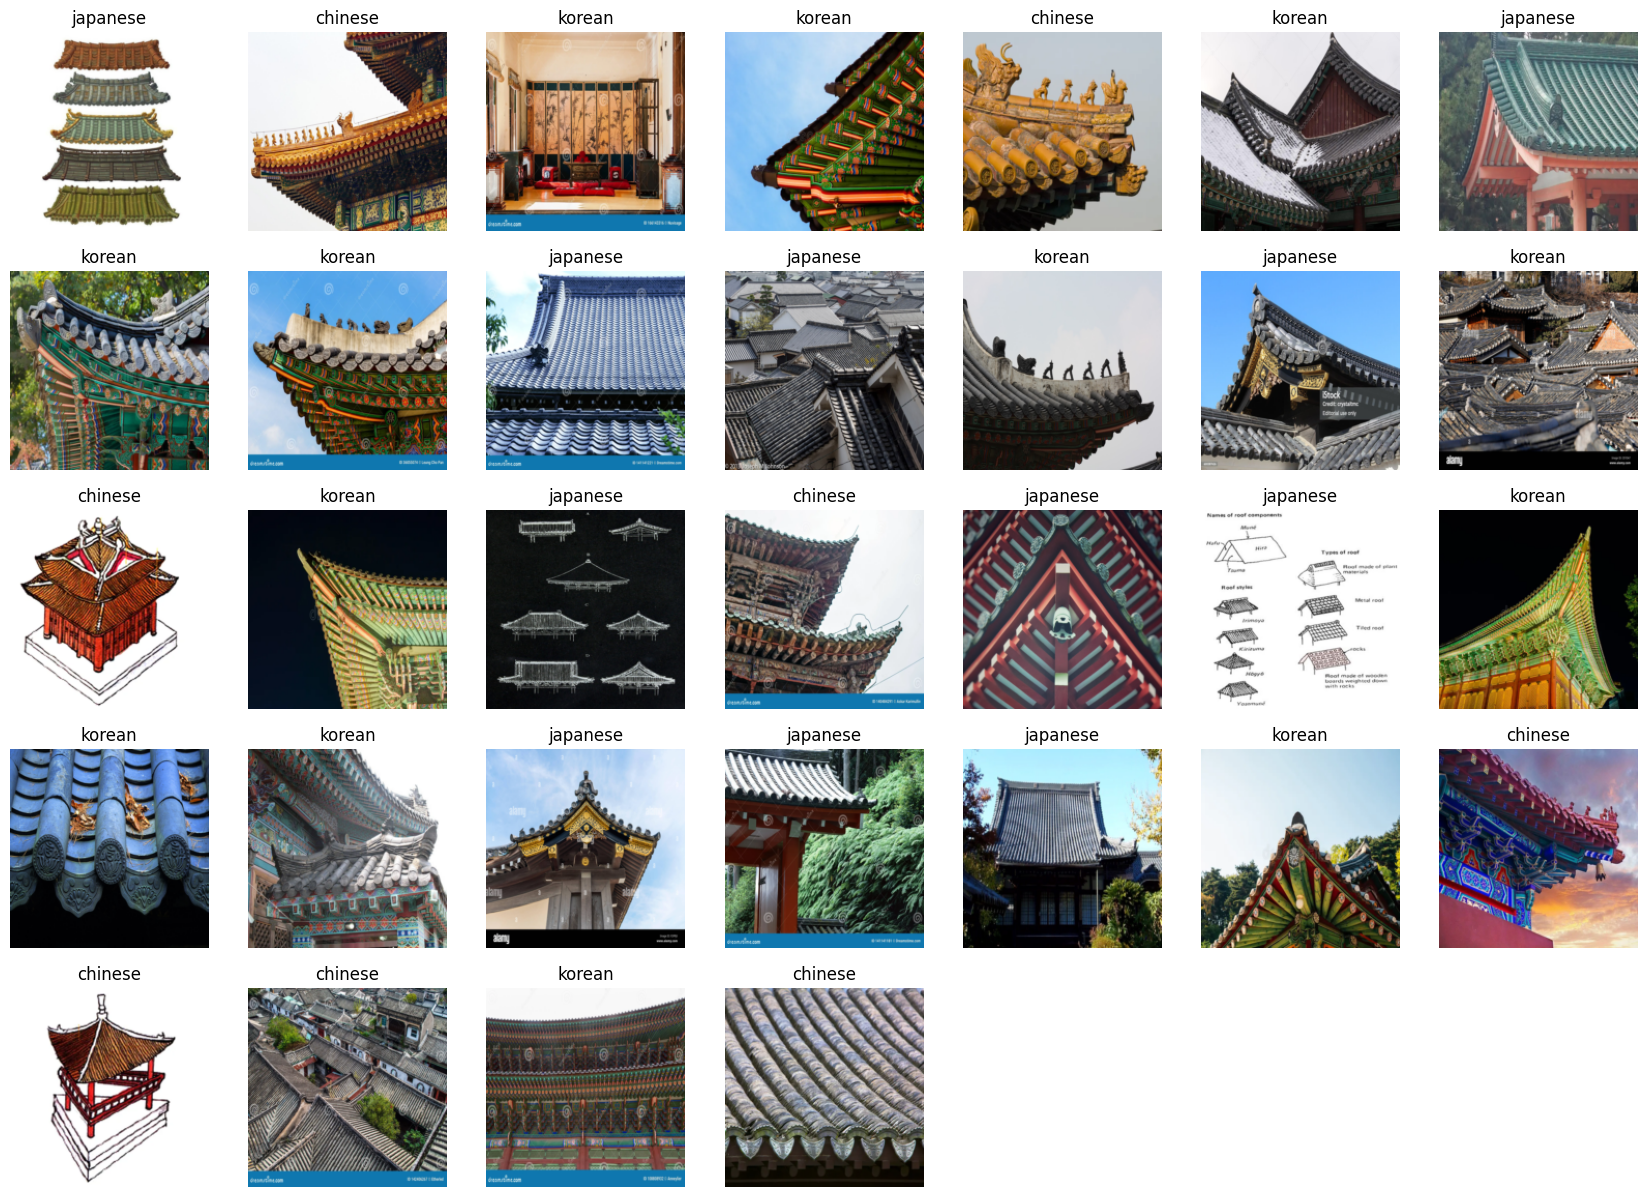

In [13]:
# dataloaders
path = Path('roofs')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=36)

In [14]:
# train
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.738246,0.807809,0.340000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.013826,0.755858,0.320000,00:03
1,0.849009,0.742393,0.340000,00:03
2,0.628484,0.869271,0.340000,00:03
3,0.477658,0.904010,0.360000,00:03
4,0.388030,0.898422,0.360000,00:03


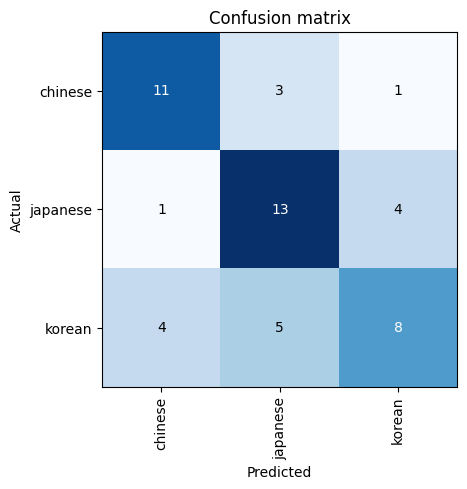

In [16]:
# confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

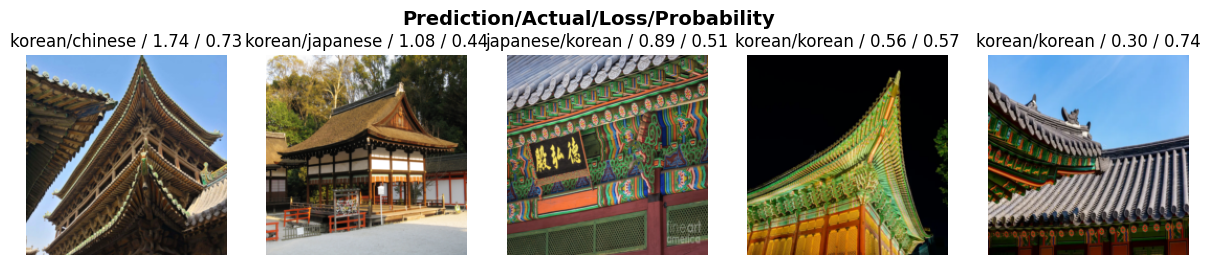

In [7]:
# plot top losses
interp.plot_top_losses(5, nrows=1)


In [8]:
# data clean
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner


searching '창경궁'


/home/positoy/.local/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


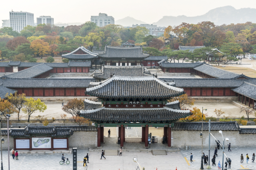

In [9]:
download_url(search_images('창경궁')[0], Path('창경궁.jpg'))
Image.open('창경궁.jpg').to_thumb(256,256)


In [10]:
country,_,probs = learn.predict(PILImage.create('창경궁.jpg'))
print(f"this is a: {country} roof")
print(f"probability : {probs[0]:.4f}")


this is a: japanese roof
probability : 0.0908


In [ ]:
!rm -rf roofs